# Daily Oil Prices

Ecuador's economy heavily relies on oil, making it particularly susceptible to fluctuations in oil prices. This vulnerability is evident in daily oil price variations, encompassing values from both the train and test data periods.

In [224]:
# libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
sns.set(rc={"figure.figsize":(12,12)})

In [225]:
oil_df = pd.read_csv("./data/oil.csv")
oil_df.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


WTI is a high-quality grade of crude oil that serves as a key benchmark for oil pricing in the United States. It is commonly used in financial markets and represents one of the major types of oil traded globally.

In [226]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [227]:
oil_df.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

There are some missing values for `dcoilwtico`. 

In [228]:
oil_df.describe().T

,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


In [229]:
# convert to datetime using pd.to_datetime
oil_df['date'] = pd.to_datetime(oil_df['date'])

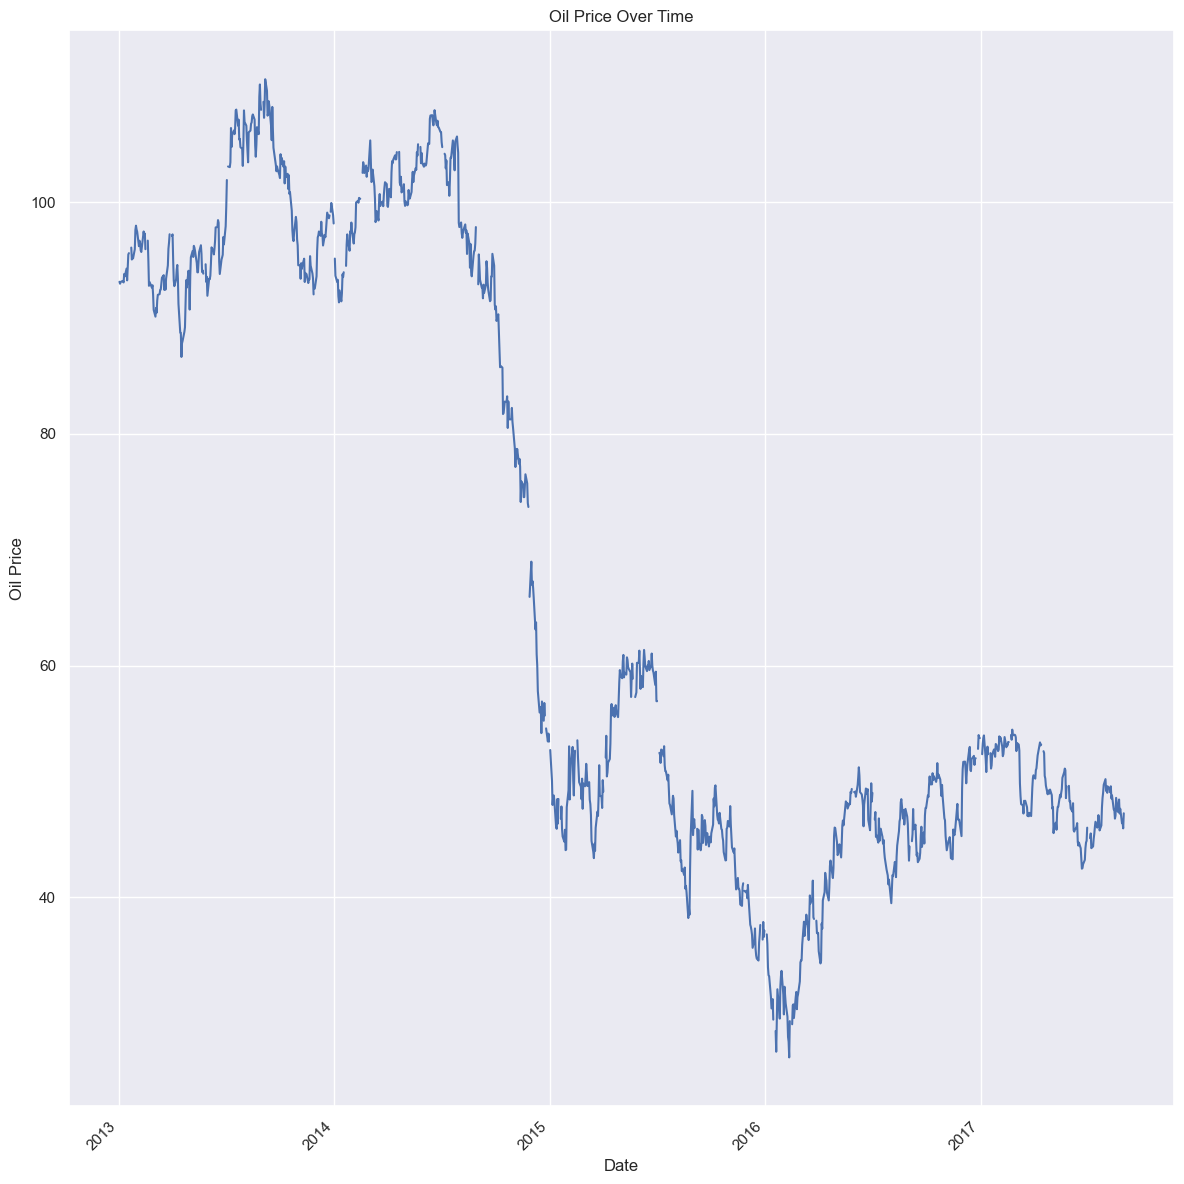

In [230]:
plt.plot(oil_df['date'], oil_df['dcoilwtico'])
plt.title('Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.xticks(rotation=45, ha='right')  # rotation and alignment
plt.tight_layout()
plt.show()

Upon analyzing the sales data, it was observed that the 35th store experienced its highest sales in 2014, surpassing figures from all other years.<br> This observation aligns with the provided chart, indicating that between 2013 and 2014, oil prices were notably elevated compared to other years. This correlation helps explain why the highest sales were recorded in 2014.

Furthermore, the impact of the decline in oil prices in 2016 is evident in the sales data, with the highest sales falling within the 30000-35000 range, whereas in other years, it could surpass 40000

In [231]:
train_df = pd.read_csv("./data/train.csv")
train_df['date'] = pd.to_datetime(train_df['date'])

In [232]:
# merge sales data and oil data
df_merged = train_df.merge(oil_df, on="date", how="left")
df_merged.head(10)

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,NaN
6,6,2013-01-01,1,CELEBRATION,0.0,0,NaN
7,7,2013-01-01,1,CLEANING,0.0,0,NaN
8,8,2013-01-01,1,DAIRY,0.0,0,NaN
9,9,2013-01-01,1,DELI,0.0,0,NaN


Following the merger of two data frames into a single entity, any missing values can be addressed by employing linear regression for imputation.

In [233]:
df_merged_copy = df_merged.set_index('date')
df_merged_copy = df_merged_copy.interpolate(method ='linear', limit_direction ='forward')
df_merged_copy = df_merged_copy.interpolate(method ='linear', limit_direction ='backward') 
# df_merged.interpolate(method="linear", limit_direction="both",inplace=True)

In [234]:
df_merged_copy = df_merged_copy.reset_index(drop=False)
df_merged_copy.head(10)

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,93.14
1,2013-01-01,1,1,BABY CARE,0.0,0,93.14
2,2013-01-01,2,1,BEAUTY,0.0,0,93.14
3,2013-01-01,3,1,BEVERAGES,0.0,0,93.14
4,2013-01-01,4,1,BOOKS,0.0,0,93.14
5,2013-01-01,5,1,BREAD/BAKERY,0.0,0,93.14
6,2013-01-01,6,1,CELEBRATION,0.0,0,93.14
7,2013-01-01,7,1,CLEANING,0.0,0,93.14
8,2013-01-01,8,1,DAIRY,0.0,0,93.14
9,2013-01-01,9,1,DELI,0.0,0,93.14


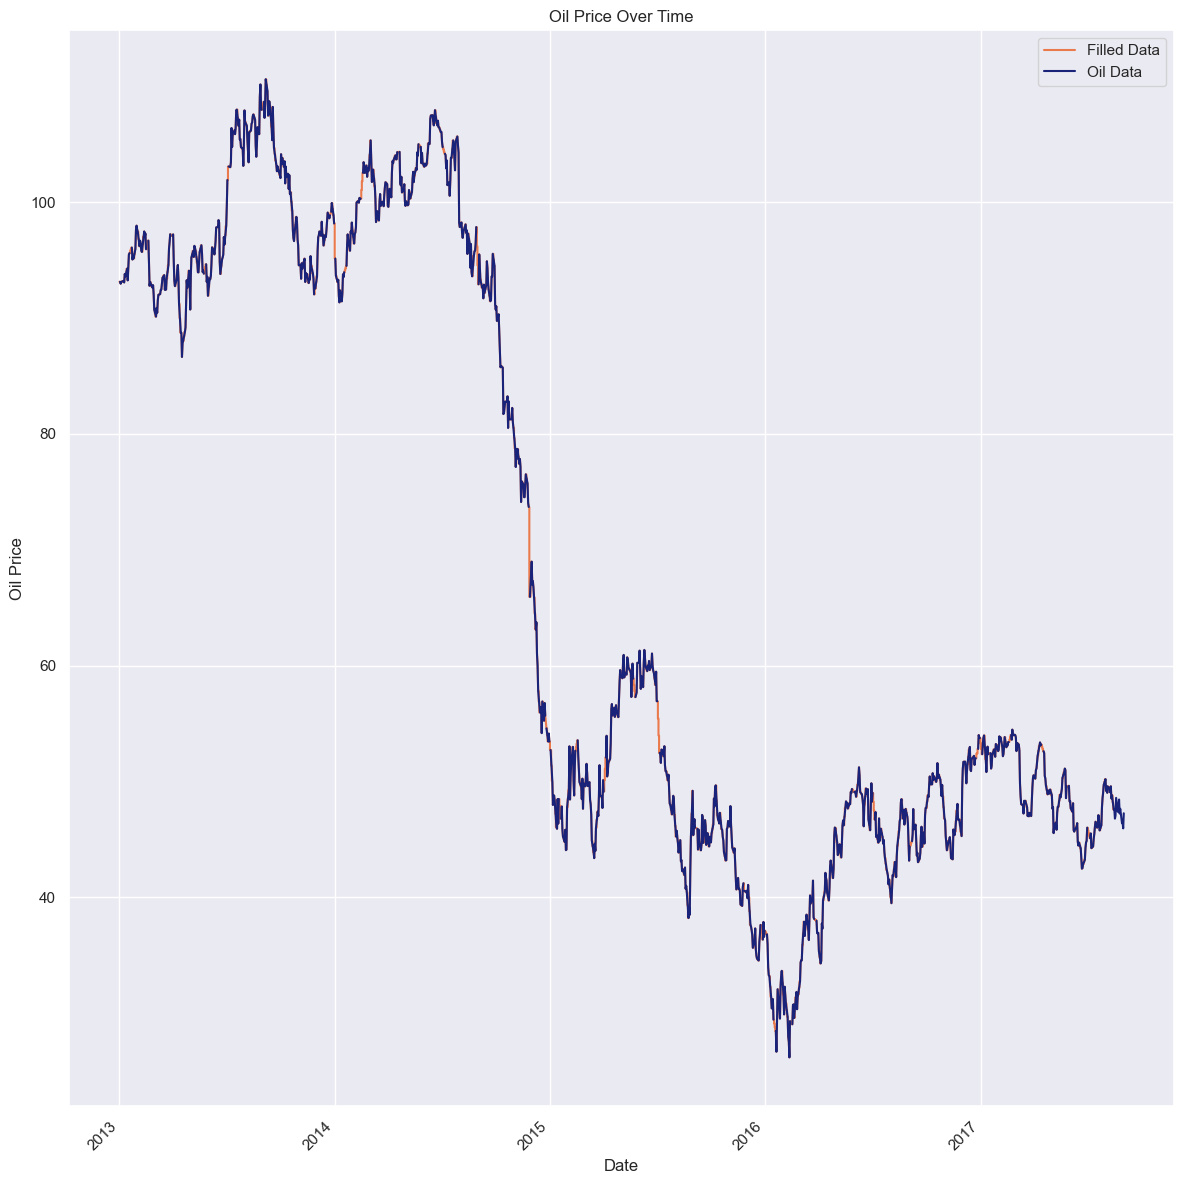

In [235]:
plt.plot(df_merged_copy['date'], df_merged_copy['dcoilwtico'], label='Filled Data', color='#ea794c')
plt.plot(oil_df['date'], oil_df['dcoilwtico'], label='Oil Data', color='#192379')
plt.title('Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
